In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import OneHotEncoder
from ydata_profiling import ProfileReport
from sklearn.ensemble import *
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.svm import *
from sklearn.pipeline import make_pipeline
from pycaret.classification import *
from catboost import CatBoostClassifier

In [2]:
# check which datasets can be imported
#list_available_datasets()

In [3]:
 # fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
#print(statlog_german_credit_data.metadata) 
  
# variable information 
#print(statlog_german_credit_data.variables) 


In [4]:
X.rename(columns= {'Attribute1':'Account_Status', 'Attribute2':'Months', 'Attribute3':'Credit_history', 'Attribute4':'Purpose', 
                   'Attribute5':'Credit_amount', 'Attribute6':'Savings_bonds','Attribute7':'employment', 'Attribute8':'Installment_rate',
                   'Attribute9':'Personal_status_and_sex', 'Attribute10':'debtors_guarantors', 'Attribute11':'residence',
                   'Attribute12':'Property', 'Attribute13':'Age', 'Attribute14':'Installment_plans', 'Attribute15':'Housing',
                   'Attribute16':'Existing_credits', 'Attribute17':'Job','Attribute18':'Liable_for_maintenance', 'Attribute19':'Telephone',
                   'Attribute20':'foreign_worker'}, inplace=True)

In [5]:
X

,Account_Status,Months,Credit_history,Purpose,Credit_amount,Savings_bonds,employment,Installment_rate,Personal_status_and_sex,debtors_guarantors,residence,Property,Age,Installment_plans,Housing,Existing_credits,Job,Liable_for_maintenance,Telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [6]:
y.value_counts()

class
1        700
2        300
Name: count, dtype: int64

In [7]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames column-wise
merged_df = pd.concat([X, y], axis=1)
merged_df

,Account_Status,Months,Credit_history,Purpose,Credit_amount,Savings_bonds,employment,Installment_rate,Personal_status_and_sex,debtors_guarantors,...,Property,Age,Installment_plans,Housing,Existing_credits,Job,Liable_for_maintenance,Telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [8]:
merged_df["class"] = np.where(merged_df["class"] == 2, 0, 1)
merged_df["foreign_worker"] = np.where(merged_df["foreign_worker"] == 'A201', 1, 0)
merged_df["Telephone"] = np.where(merged_df["Telephone"] == 'A191', 0, 1)

In [9]:
merged_df

,Account_Status,Months,Credit_history,Purpose,Credit_amount,Savings_bonds,employment,Installment_rate,Personal_status_and_sex,debtors_guarantors,...,Property,Age,Installment_plans,Housing,Existing_credits,Job,Liable_for_maintenance,Telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,1,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,0,1,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,0,1,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,0,1,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,0,1,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,1,1,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,0,1,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,1,1,0


In [10]:
merged_df['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

In [11]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Liable_for_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Telephone,1000.0,0.404,0.490943,0.0,0.0,0.0,1.00,1.0
foreign_worker,1000.0,0.963,0.188856,0.0,1.0,1.0,1.00,1.0
class,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0


In [12]:
# profile = ProfileReport(merged_df, title = 'Data Profiling Report')
# profile.to_widgets()

In [13]:
credit_risk_by_Credit_history = (merged_df.groupby('Credit_history')['class'].mean())*100
credit_risk_by_Credit_history

Credit_history
A30    37.500000
A31    42.857143
A32    68.113208
A33    68.181818
A34    82.935154
Name: class, dtype: float64

In [14]:
credit_risk_by_account_status = (merged_df.groupby('Account_Status')['class'].mean())*100
credit_risk_by_account_status

Account_Status
A11    50.729927
A12    60.966543
A13    77.777778
A14    88.324873
Name: class, dtype: float64

In [15]:
credit_risk_by_purpose = (merged_df.groupby('Purpose')['class'].mean())*100
credit_risk_by_purpose

Purpose
A40     61.965812
A41     83.495146
A410    58.333333
A42     67.955801
A43     77.857143
A44     66.666667
A45     63.636364
A46     56.000000
A48     88.888889
A49     64.948454
Name: class, dtype: float64

In [16]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
merged_df['month_group'] = pd.cut(merged_df['Months'], bins=bins, labels=labels, right=False)
credit_risk_by_month = (merged_df.groupby('month_group')['class'].mean())*100

credit_risk_by_month

month_group
0-10     83.216783
10-20    73.200993
20-30    70.124481
30-40    60.305344
40-50    45.454545
50-60    50.000000
60-70    53.846154
70-80     0.000000
Name: class, dtype: float64

In [17]:
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65-75']
merged_df['age_group'] = pd.cut(merged_df['Age'], bins= bins, labels= labels, right= False)
credit_risk_by_age = (merged_df.groupby('age_group')['class'].mean())*100
credit_risk_by_age

age_group
15-25    59.060403
25-35    67.167920
35-45    76.892430
45-55    77.049180
55-65    71.428571
65-75    71.428571
Name: class, dtype: float64

In [18]:
bins = [200, 500, 800, 1100, 1400]
labels = ['200-500', '500-800', '800-1100', '1100-1400']
merged_df['credit_amt_group'] = pd.cut(merged_df['Credit_amount'], bins= bins, labels= labels, right= False)
credit_risk_by_credit_amoount = (merged_df.groupby('credit_amt_group')['class'].mean())*100
credit_risk_by_credit_amoount 

credit_amt_group
200-500      83.333333
500-800      66.071429
800-1100     68.852459
1100-1400    68.939394
Name: class, dtype: float64

In [19]:
credit_risk_by_Savings_bonds = (merged_df.groupby('Savings_bonds')['class'].mean())*100
credit_risk_by_Savings_bonds

Savings_bonds
A61    64.013267
A62    66.990291
A63    82.539683
A64    87.500000
A65    82.513661
Name: class, dtype: float64

In [20]:
credit_risk_by_employment = (merged_df.groupby('employment')['class'].mean())*100 
credit_risk_by_employment

employment
A71    62.903226
A72    59.302326
A73    69.321534
A74    77.586207
A75    74.703557
Name: class, dtype: float64

In [21]:
credit_risk_by_Installment_rate = (merged_df.groupby('Installment_rate')['class'].mean())*100
credit_risk_by_Installment_rate

Installment_rate
1    75.000000
2    73.160173
3    71.337580
4    66.596639
Name: class, dtype: float64

In [22]:
credit_risk_by_Personal_status_and_sex = (merged_df.groupby('Personal_status_and_sex')['class'].mean())*100
credit_risk_by_Personal_status_and_sex

Personal_status_and_sex
A91    60.000000
A92    64.838710
A93    73.357664
A94    72.826087
Name: class, dtype: float64

In [23]:
credit_risk_by_debtors_guarantors = (merged_df.groupby('debtors_guarantors')['class'].mean())*100
credit_risk_by_debtors_guarantors

debtors_guarantors
A101    70.011025
A102    56.097561
A103    80.769231
Name: class, dtype: float64

In [24]:
credit_risk_by_residence = (merged_df.groupby('residence')['class'].mean())*100
credit_risk_by_residence

residence
1    72.307692
2    68.506494
3    71.140940
4    69.975787
Name: class, dtype: float64

In [25]:
credit_risk_by_Property = (merged_df.groupby('Property')['class'].mean())*100
credit_risk_by_Property

Property
A121    78.723404
A122    69.396552
A123    69.277108
A124    56.493506
Name: class, dtype: float64

In [26]:
credit_risk_by_Housing = (merged_df.groupby('Housing')['class'].mean())*100
credit_risk_by_Housing

Housing
A151    60.893855
A152    73.913043
A153    59.259259
Name: class, dtype: float64

In [27]:
credit_risk_by_Telephone = (merged_df.groupby('Telephone')['class'].mean())*100
credit_risk_by_Telephone

Telephone
0    68.624161
1    72.029703
Name: class, dtype: float64

In [28]:
credit_risk_by_foreign_worker = (merged_df.groupby('foreign_worker')['class'].mean())*100
credit_risk_by_foreign_worker

foreign_worker
0    89.189189
1    69.262721
Name: class, dtype: float64

In [29]:
merged_df.columns

Index(['Account_Status', 'Months', 'Credit_history', 'Purpose',
       'Credit_amount', 'Savings_bonds', 'employment', 'Installment_rate',
       'Personal_status_and_sex', 'debtors_guarantors', 'residence',
       'Property', 'Age', 'Installment_plans', 'Housing', 'Existing_credits',
       'Job', 'Liable_for_maintenance', 'Telephone', 'foreign_worker', 'class',
       'month_group', 'age_group', 'credit_amt_group'],
      dtype='object')

In [30]:
merged_df.drop(columns= ['month_group', 'age_group', 'credit_amt_group'], inplace= True)

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Account_Status           1000 non-null   object
 1   Months                   1000 non-null   int64 
 2   Credit_history           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_amount            1000 non-null   int64 
 5   Savings_bonds            1000 non-null   object
 6   employment               1000 non-null   object
 7   Installment_rate         1000 non-null   int64 
 8   Personal_status_and_sex  1000 non-null   object
 9   debtors_guarantors       1000 non-null   object
 10  residence                1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Installment_plans        1000 non-null   object
 14  Housing                  1000 non-null   

In [32]:
# one_hot_encoded_data = pd.get_dummies(merged_df, columns = ['Account_Status', 'Credit_history', 'Savings_bonds', 'employment', 'Personal_status_and_sex',
#                                                        'debtors_guarantors', 'Property', 'Installment_plans', 'Housing', 'Job', 'Telephone', 'foreign_worker'])
# one_hot_encoded_data.head()

In [33]:
# Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(merged_df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_merged_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
merged_df_encoded = pd.concat([merged_df, one_hot_merged_df], axis=1)

# Drop the original categorical columns
merged_df_encoded = merged_df_encoded.drop(categorical_columns, axis=1)

In [34]:
merged_df_encoded.head()

,Months,Credit_amount,Installment_rate,residence,Age,Existing_credits,Liable_for_maintenance,Telephone,foreign_worker,class,...,Installment_plans_A141,Installment_plans_A142,Installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,2,0,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,2,0,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
merged_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Months                       1000 non-null   int64  
 1   Credit_amount                1000 non-null   int64  
 2   Installment_rate             1000 non-null   int64  
 3   residence                    1000 non-null   int64  
 4   Age                          1000 non-null   int64  
 5   Existing_credits             1000 non-null   int64  
 6   Liable_for_maintenance       1000 non-null   int64  
 7   Telephone                    1000 non-null   int32  
 8   foreign_worker               1000 non-null   int32  
 9   class                        1000 non-null   int32  
 10  Account_Status_A11           1000 non-null   float64
 11  Account_Status_A12           1000 non-null   float64
 12  Account_Status_A13           1000 non-null   float64
 13  Account_Status_A14 

In [36]:
X = merged_df_encoded.drop(columns=['class'])
y = merged_df_encoded['class']


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

feature_importances = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances.head(20))

                             importance
Credit_amount                  0.104141
Months                         0.079965
Age                            0.077939
Account_Status_A14             0.052625
Installment_rate               0.036735
Account_Status_A11             0.036172
residence                      0.035457
Credit_history_A34             0.022121
Savings_bonds_A61              0.021204
Account_Status_A12             0.020324
Existing_credits               0.018585
Purpose_A40                    0.017635
Property_A123                  0.015894
Personal_status_and_sex_A92    0.015574
Installment_plans_A143         0.015548
Property_A121                  0.015511
employment_A73                 0.015434
Job_A173                       0.015303
Housing_A152                   0.014977
Telephone                      0.014836


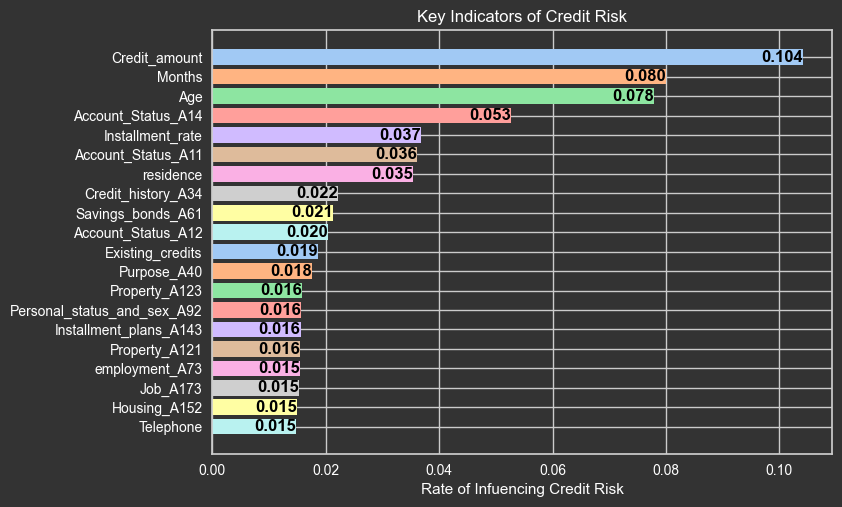

In [37]:
palette = sns.color_palette('pastel')

# Create a bar chart of the top 10 features and their importances
fig, ax = plt.subplots()
fig.patch.set_facecolor('#333333')  # Set the figure background to dark
ax.set_facecolor('#333333')  # Set the axes background to dark

bars = ax.barh(feature_importances.index[:20], feature_importances['importance'][:20], color=palette)
ax.invert_yaxis()
ax.set_xlabel('Rate of Infuencing Credit Risk')
ax.set_title('Key Indicators of Credit Risk')
ax.xaxis.label.set_color('white')  # Set the x-axis label color to white
ax.yaxis.label.set_color('white')  # Set the y-axis label color to white
ax.title.set_color('white')  # Set the title color to white

# Change tick colors to white
ax.tick_params(axis='both', colors='white')

# Add labels to the bars
for bar, value in zip(bars, feature_importances['importance'][:20]):
    ax.text(value, bar.get_y() + bar.get_height()/2, f'{value:.3f}', color='black', fontweight='bold', ha='right', va='center')

plt.show()

In [38]:
merged_df_encoded['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

In [39]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(merged_df_encoded.drop(['class'], axis=1), merged_df_encoded['class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [40]:
oversampled['class'].value_counts()

class
1    700
0    700
Name: count, dtype: int64

In [41]:
oversampled.head()

,class,Months,Credit_amount,Installment_rate,residence,Age,Existing_credits,Liable_for_maintenance,Telephone,foreign_worker,...,Installment_plans_A141,Installment_plans_A142,Installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,1,6,1169,4,4,67,2,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,48,5951,2,2,22,1,1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,12,2096,2,3,49,1,2,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,42,7882,2,4,45,1,2,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,24,4870,3,4,53,2,2,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
X = oversampled.drop(['class'], axis=1)
y = oversampled['class']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# numerical features
num_cols = ['Months','Credit_amount','Installment_rate','residence', 'Age', 'Existing_credits', 'Liable_for_maintenance']

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [45]:
X_train.shape, X_test.shape

((1120, 59), (280, 59))

Confusion Matrix:
[[105  26]
 [ 20 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       131
           1       0.83      0.87      0.85       149

    accuracy                           0.84       280
   macro avg       0.84      0.83      0.83       280
weighted avg       0.84      0.84      0.84       280

Accuracy: 0.8357142857142857

AUC Score: 0.923433577539833


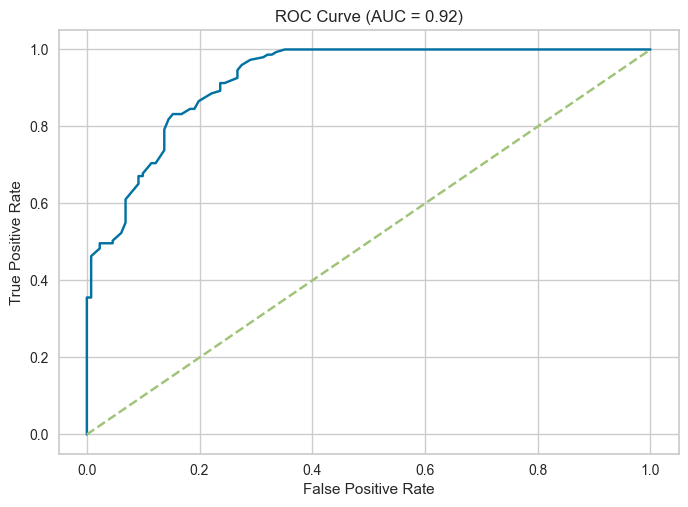

In [46]:
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
y_pred_prob = rf_reg.predict_proba(X_test)[:, 1]


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC Score:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

Confusion Matrix:
 [[108  23]
 [ 22 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       131
           1       0.85      0.85      0.85       149

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280

Accuracy: 0.8392857142857143
AUC: 0.9261744966442953


Text(0.5, 1.0, 'ROC Curve (AUC = 0.93)')

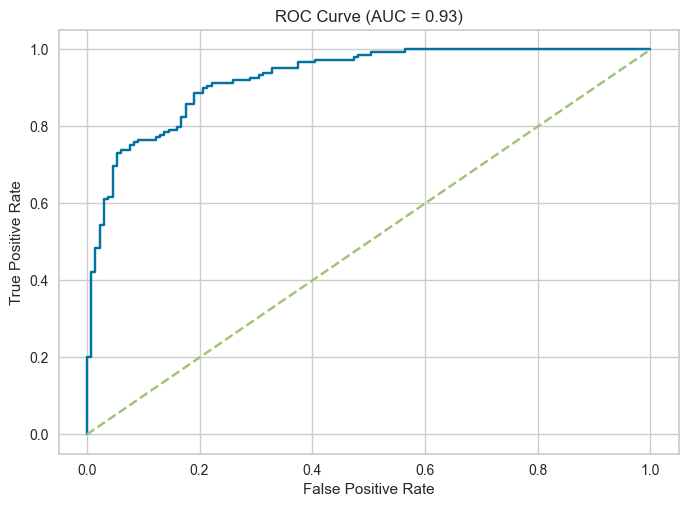

In [47]:
# Initialize CatBoostClassifier
cat = CatBoostClassifier(random_state=42, verbose=0)

# Fit the model
cat.fit(X_train, y_train)

# Make predictions on test data
y_pred = cat.predict(X_test)
y_pred_prob = cat.predict_proba(X_test)[:, 1]

# Compute confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)
accu = accuracy_score(y_test, y_pred)
print('Accuracy:', accu)


# # Compute AUC
# auc = roc_auc_score(y_test, y_pred_prob)
# print("AUC:", auc)


# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))


Confusion Matrix:
[[103  28]
 [ 26 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       131
           1       0.81      0.83      0.82       149

    accuracy                           0.81       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.81      0.81      0.81       280

Accuracy: 0.8071428571428572
AUC: 0.9110097853373637


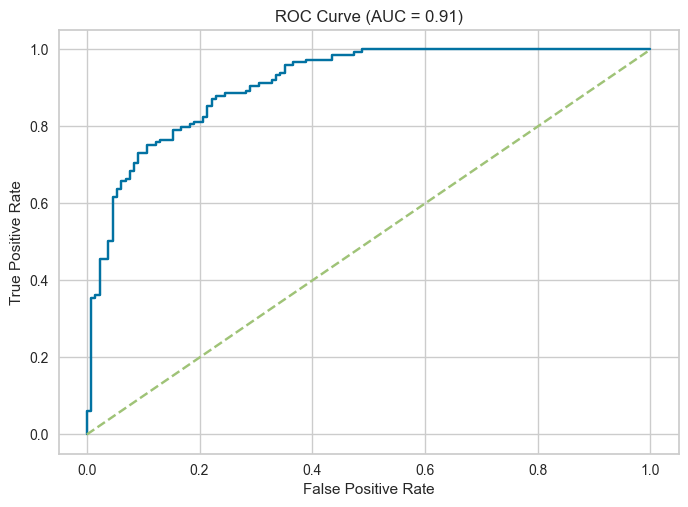

In [48]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [49]:
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Define parameter grid for randomized search
param_dist = {
    'iterations': np.arange(100, 1000, 50),
    'depth': np.arange(3, 10, 1),
    'learning_rate': np.logspace(-3, 0, 10),
    'l2_leaf_reg': np.logspace(-3, 3, 10),
    'border_count': np.arange(32, 200, 8)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_dist, 
    n_iter=50, 
    scoring='accuracy', 
    cv=3, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters:  {'learning_rate': 0.046415888336127774, 'l2_leaf_reg': 0.1, 'iterations': 350, 'depth': 4, 'border_count': 152}
Best Score:  0.8312449522826434
Test Set Accuracy:  0.8535714285714285


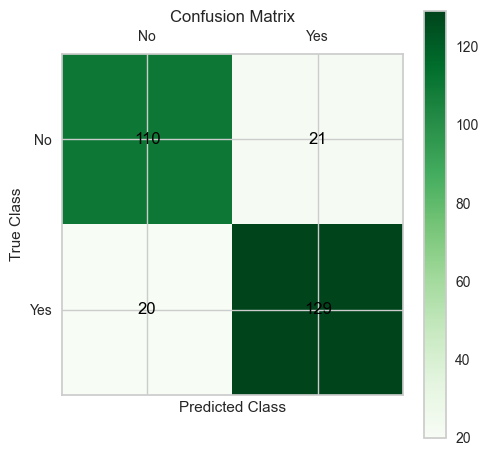

In [50]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
plt.matshow(cm, cmap=plt.cm.Greens)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

In [51]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as Credit_Risk:
    pickle.dump(best_model, Credit_Risk)

In [52]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [53]:
# # Make predictions
# y_pred = clf.predict(X_test)
# y_pred_prob = clf.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:\n", report)
# print("Confusion Matrix:\n", conf_matrix)

# # add AUC-ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# auc = roc_auc_score(y_test, y_pred_prob)
# print("\nAUC Score:", auc)

# plt.plot(fpr, tpr)
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
# plt.show()

In [54]:
clf1 = setup(data = merged_df_encoded, target = 'class')

# compare models
best = compare_models()

,Description,Value
0,Session id,2192
1,Target,class
2,Target type,Binary
3,Original data shape,"(1000, 60)"
4,Transformed data shape,"(1000, 60)"
5,Transformed train set shape,"(700, 60)"
6,Transformed test set shape,"(300, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7643,0.7873,0.9224,0.7808,0.8455,0.3614,0.3871,0.0340
catboost,CatBoost Classifier,0.7614,0.7975,0.9082,0.7852,0.8419,0.3649,0.3832,0.6480
lightgbm,Light Gradient Boosting Machine,0.7529,0.7870,0.8673,0.7981,0.8309,0.3736,0.3793,0.1890
gbc,Gradient Boosting Classifier,0.7500,0.7686,0.8796,0.7883,0.8311,0.3544,0.3642,0.0280
ridge,Ridge Classifier,0.7400,0.7770,0.8571,0.7900,0.8219,0.3424,0.3472,0.0060
lr,Logistic Regression,0.7371,0.7775,0.8510,0.7900,0.8192,0.3398,0.3435,0.2400
et,Extra Trees Classifier,0.7371,0.7724,0.8694,0.7806,0.8224,0.3218,0.3292,0.0360
lda,Linear Discriminant Analysis,0.7343,0.7776,0.8388,0.7940,0.8155,0.3412,0.3434,0.0060
xgboost,Extreme Gradient Boosting,0.7286,0.7685,0.8449,0.7848,0.8134,0.3172,0.3210,0.0340
ada,Ada Boost Classifier,0.7271,0.7614,0.8408,0.7844,0.8114,0.3194,0.3234,0.0160


In [55]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2192, verbose=0,
                       warm_start=False)


In [56]:
X.columns

Index(['Months', 'Credit_amount', 'Installment_rate', 'residence', 'Age',
       'Existing_credits', 'Liable_for_maintenance', 'Telephone',
       'foreign_worker', 'Account_Status_A11', 'Account_Status_A12',
       'Account_Status_A13', 'Account_Status_A14', 'Credit_history_A30',
       'Credit_history_A31', 'Credit_history_A32', 'Credit_history_A33',
       'Credit_history_A34', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_bonds_A61',
       'Savings_bonds_A62', 'Savings_bonds_A63', 'Savings_bonds_A64',
       'Savings_bonds_A65', 'employment_A71', 'employment_A72',
       'employment_A73', 'employment_A74', 'employment_A75',
       'Personal_status_and_sex_A91', 'Personal_status_and_sex_A92',
       'Personal_status_and_sex_A93', 'Personal_status_and_sex_A94',
       'debtors_guarantors_A101', 'debtors_guarantors_A102',
       'debtors_guarantors_A103', 'P

In [57]:
merged_df['residence'].head()

0    4
1    2
2    3
3    4
4    4
Name: residence, dtype: int64